# Deep Learning | Model Tuning and Regualarization

### Dataset: MNIST Fashion| Framework: Keras (Tensorflow)

## 🔹 1. Setup & Data Loading

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import layers, models, regularizers

2025-04-28 20:45:24.091646: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745855124.109060   85664 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745855124.113246   85664 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-28 20:45:24.128368: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### ✅ EDA and Preprocessing

In [12]:
x_test.shape

(10000, 784)

In [5]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [7]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]

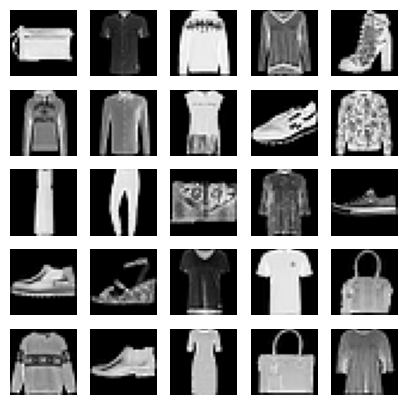

In [8]:
# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray'); plt.axis('off') 

In [9]:
num_labels = len(np.unique(y_train))
print(num_labels)

10


In [10]:
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [11]:
# Normalize and reshape
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

## 🔹 2. Train MLP on MNIST

### ✅ Baseline Model

In [13]:
# Define baseline model
def build_baseline_model():
    model = models.Sequential([
        layers.Input(shape=(784,)),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [14]:
baseline_model = build_baseline_model()
baseline_model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])
baseline_model.summary()

I0000 00:00:1745855299.114558   85664 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1879 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1060 6GB, pci bus id: 0000:01:00.0, compute capability: 6.1


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

### ✅ Train the model

In [15]:
history_baseline = baseline_model.fit(x_train, y_train, epochs=30,
                                      validation_split=0.2, batch_size=128, verbose=1)

Epoch 1/30


I0000 00:00:1745855314.436645   85773 service.cc:148] XLA service 0x7fa56c008d20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745855314.436687   85773 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 6GB, Compute Capability 6.1
2025-04-28 20:48:34.451269: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1745855314.513944   85773 cuda_dnn.cc:529] Loaded cuDNN version 90300


 63/375 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5664 - loss: 1.2812

I0000 00:00:1745855315.241802   85773 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7355 - loss: 0.7762 - val_accuracy: 0.8300 - val_loss: 0.4747
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8567 - loss: 0.4155 - val_accuracy: 0.8587 - val_loss: 0.4064
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8642 - loss: 0.3811 - val_accuracy: 0.8640 - val_loss: 0.3914
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8738 - loss: 0.3554 - val_accuracy: 0.8731 - val_loss: 0.3551
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8855 - loss: 0.3214 - val_accuracy: 0.8553 - val_loss: 0.3907
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8841 - loss: 0.3144 - val_accuracy: 0.8805 - val_loss: 0.3349
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8917 - loss: 0.2974 - val_accuracy: 0.8775 - val_loss: 0.3369
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8969 - loss: 0.2852 - val_accuracy: 0.8840 - val_

In [16]:
def plot_learning_curves(history, title='Model'):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b-', label='Train Accuracy')
    plt.plot(epochs, val_acc, 'r--', label='Val Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b-', label='Train Loss')
    plt.plot(epochs, val_loss, 'r--', label='Val Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


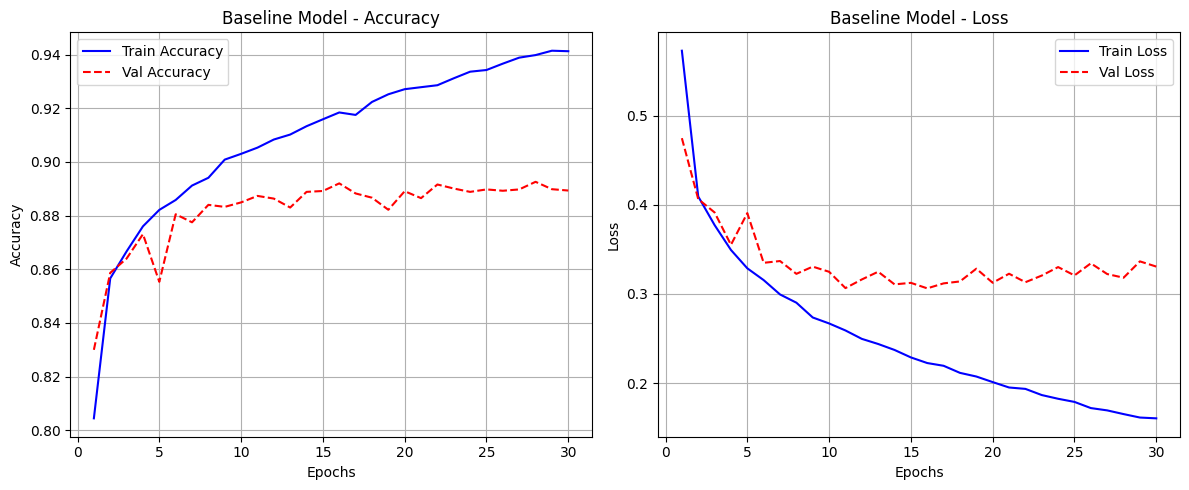

In [17]:
plot_learning_curves(history_baseline, title='Baseline Model')

### ✅ Evaluate model's performance

In [18]:
loss1, acc1 = baseline_model.evaluate(x_test, y_test)
print(f"Test accuracy : {100*acc1:.2f}%")
print(f"Test loss     : {100*loss1:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8843 - loss: 0.3589    
Test accuracy : 88.46%
Test loss     : 35.87%


## 🔹 3. Underfitting vs Overfitting Models

In [19]:
# Underfitting: Very small model
def build_small_model():
    model = models.Sequential([
        layers.Input(shape=(784,)),
        layers.Dense(32, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Overfitting: Deep + Wide
def build_large_model():
    model = models.Sequential([
        layers.Input(shape=(784,)),
        layers.Dense(512, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [20]:
small_model = build_small_model()

small_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

small_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,450 (99.41 KB)

 Trainable params: 25,450 (99.41 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
large_model = build_large_model()

large_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

large_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
history_small = small_model.fit(x_train, y_train, epochs=30, validation_split=0.2, batch_size=128)

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6711 - loss: 0.9943 - val_accuracy: 0.8242 - val_loss: 0.5057
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8430 - loss: 0.4688 - val_accuracy: 0.8500 - val_loss: 0.4386
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8519 - loss: 0.4297 - val_accuracy: 0.8558 - val_loss: 0.4172
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8597 - loss: 0.3996 - val_accuracy: 0.8603 - val_loss: 0.4028
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8676 - loss: 0.3807 - val_accuracy: 0.8624 - val_loss: 0.3976
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8700 - loss: 0.3717 - val_accuracy: 0.8643 - val_loss: 0.3869
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8745 - loss: 0.3598 - val_accuracy: 0.8664 - val_loss: 0.3795
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8793 - loss: 0.3448 - val_accuracy: 0.

In [23]:
history_large = large_model.fit(x_train, y_train, epochs=30, validation_split=0.2, batch_size=128)

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7734 - loss: 0.6466 - val_accuracy: 0.8610 - val_loss: 0.3908
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8691 - loss: 0.3597 - val_accuracy: 0.8664 - val_loss: 0.3616
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8785 - loss: 0.3239 - val_accuracy: 0.8788 - val_loss: 0.3294
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8902 - loss: 0.2934 - val_accuracy: 0.8791 - val_loss: 0.3370
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8944 - loss: 0.2783 - val_accuracy: 0.8767 - val_loss: 0.3390
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9060 - loss: 0.2531 - val_accuracy: 0.8746 - val_loss: 0.3463
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9083 - loss: 0.2453 - val_accuracy: 0.8788 - val_loss: 0.3376
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9121 - loss: 0.2348 - val_accuracy: 0.

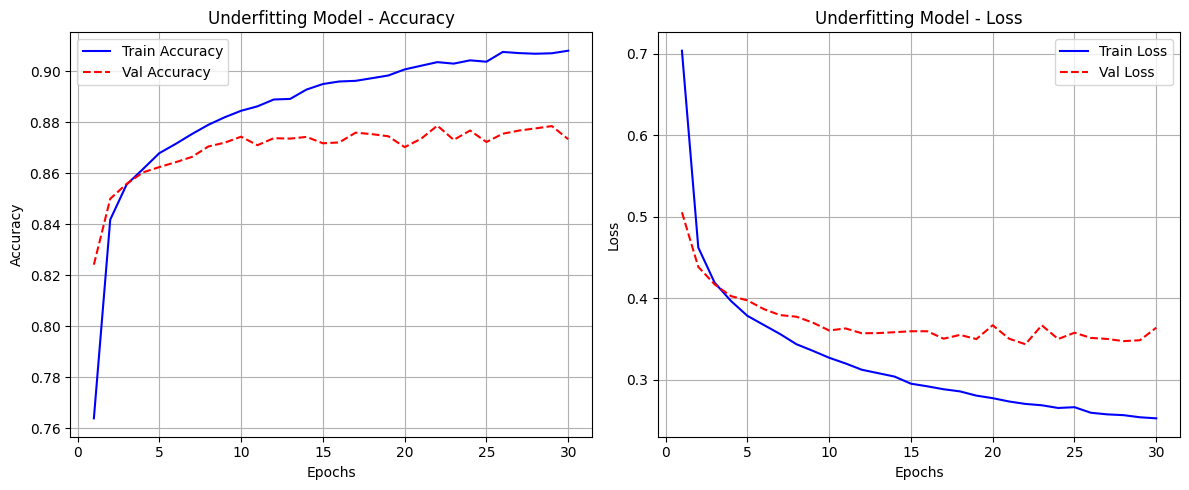

In [24]:
plot_learning_curves(history_small, title='Underfitting Model')

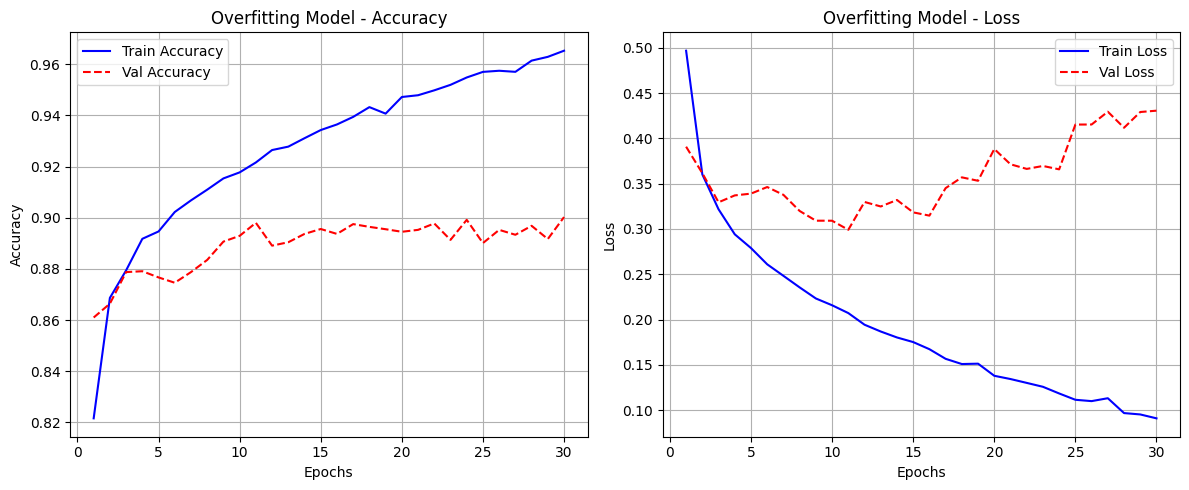

In [25]:
plot_learning_curves(history_large, title='Overfitting Model')

## 🔹 4. Regularized Model

### ✅ Dropout Regularization

In [26]:
def build_dropout_model():
    model = models.Sequential([
        layers.Input(shape=(784,)),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(10, activation='softmax')
    ])
    return model

reg_model_1 = build_dropout_model()
reg_model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

reg_model_1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
history_reg_1 = reg_model_1.fit(x_train, y_train, epochs=30, validation_split=0.2, batch_size=128)

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7307 - loss: 0.7481 - val_accuracy: 0.8472 - val_loss: 0.4162
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8460 - loss: 0.4234 - val_accuracy: 0.8654 - val_loss: 0.3695
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8613 - loss: 0.3757 - val_accuracy: 0.8732 - val_loss: 0.3534
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8694 - loss: 0.3560 - val_accuracy: 0.8708 - val_loss: 0.3499
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8706 - loss: 0.3477 - val_accuracy: 0.8755 - val_loss: 0.3366
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8798 - loss: 0.3245 - val_accuracy: 0.8722 - val_loss: 0.3454
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8828 - loss: 0.3127 - val_accuracy: 0.8798 - val_loss: 0.3227
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8871 - loss: 0.2998 - val_accuracy: 0.

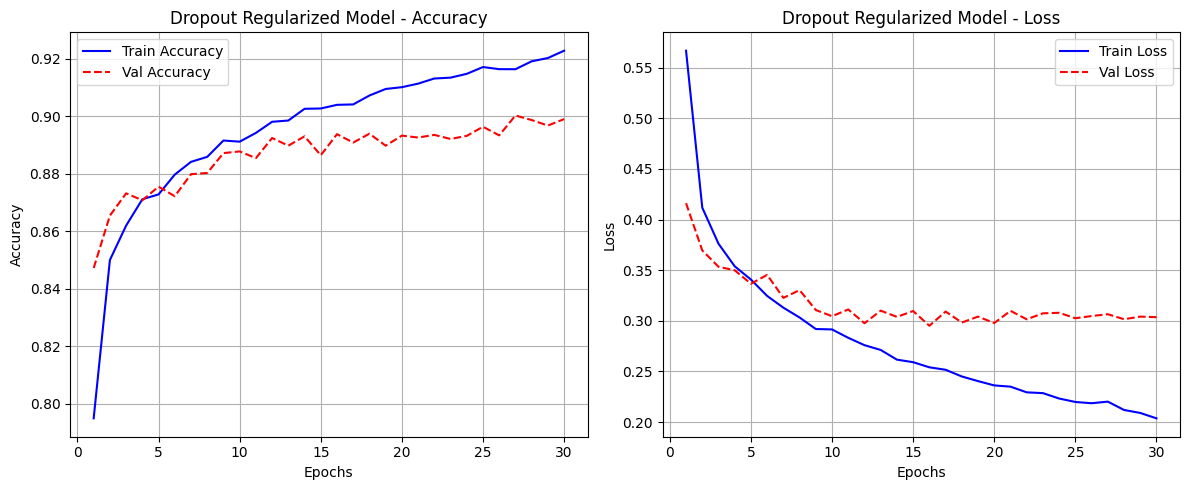

In [28]:
plot_learning_curves(history_reg_1, title='Dropout Regularized Model')

### ✅ L2 Regularization

In [ ]:
def build_l2_regularized_model():
    model = models.Sequential([
        layers.Input(shape=(784,)),
        layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(10, activation='softmax')
    ])
    return model

reg_model_2 = build_l2_regularized_model()
reg_model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

reg_model_2.summary()

In [ ]:
history_reg_2 = reg_model_2.fit(x_train, y_train, epochs=30, validation_split=0.2, batch_size=128)

In [ ]:
plot_learning_curves(history_reg_2, title='L2 Regularized Model')

### ✅ Combined Regularized Model

In [ ]:
def build_regularized_model():
    model = models.Sequential([
        layers.Input(shape=(784,)),
        layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dropout(0.2),
        layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dropout(0.2),
        layers.Dense(10, activation='softmax')
    ])
    return model

reg_model_3 = build_regularized_model()
reg_model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

reg_model_3.summary()

In [ ]:
history_reg_3 = reg_model_3.fit(x_train, y_train, epochs=30, validation_split=0.2, batch_size=128)

In [ ]:
plot_learning_curves(history_reg_3, title='Regularized Model')

## 🔹 5. Comparison

In [29]:
# Evaluate on test set
models_dict = {
    "Baseline": baseline_model,
    "Underfitting": small_model,
    "Overfitting": large_model,
    "Dropout Regularized": reg_model_1,
    # "L2 Regularized": reg_model_2,
    # "Combined Regularized": reg_model_3
}

for name, model in models_dict.items():
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    print(f'{name} Model Test Accuracy: {test_acc:.4f}')

Baseline Model Test Accuracy: 0.8846
Underfitting Model Test Accuracy: 0.8667
Overfitting Model Test Accuracy: 0.8923
Dropout Regularized Model Test Accuracy: 0.8926


## 🔹 6. Learning Rate Experimentation

In [30]:
def build_lr_model():
    model = models.Sequential([
        layers.Input(shape=(784,)),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Learning rates to test
learning_rates = {
    'Low LR (1e-5)': 1e-5,
    'Medium LR (1e-3)': 1e-3,
    'High LR (1e-1)': 1e-1
}

histories_lr = {}

for label, lr in learning_rates.items():
    print(f"\nTraining with {label}")
    model = build_lr_model()
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=128, verbose=0)
    histories_lr[label] = history



Training with Low LR (1e-5)

Training with Medium LR (1e-3)

Training with High LR (1e-1)


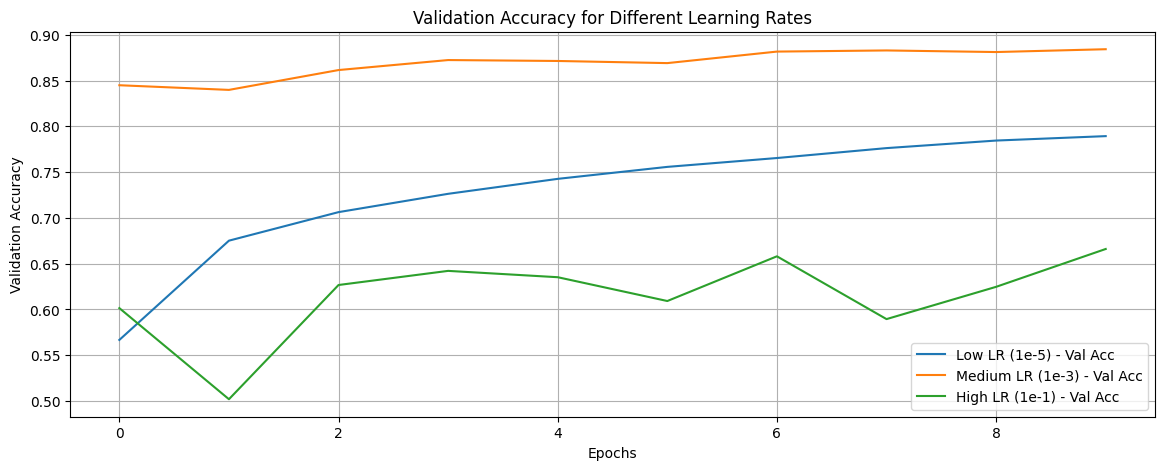

In [31]:
def plot_lr_comparisons(histories):
    plt.figure(figsize=(14, 5))

    for label, history in histories.items():
        plt.plot(history.history['val_accuracy'], label=f'{label} - Val Acc')

    plt.title("Validation Accuracy for Different Learning Rates")
    plt.xlabel("Epochs")
    plt.ylabel("Validation Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_lr_comparisons(histories_lr)


## 🔹 4. Best Model

In [ ]:
def build_best_mlp():
    model = models.Sequential([
        layers.Input(shape=(784,)),
        
        layers.Dense(1024, activation='relu'),
        layers.Dropout(0.5),
        
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.4),
        
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        
        layers.Dense(10, activation='softmax')
    ])
    return model


In [ ]:
best_mlp = build_best_mlp()
best_mlp.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
best_mlp.summary()

### ✅ Define the Callbacks

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-6)
checkpoint = ModelCheckpoint('best_fashion_mnist_model.keras', monitor='val_loss', save_best_only=True, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)

### ✅ Train the Model with Callbacks

In [ ]:
history_best_mlp = best_mlp.fit(
    x_train, y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.2,
    callbacks=[reduce_lr, checkpoint, early_stop],
    verbose=1
)

In [ ]:
plot_learning_curves(history_best_mlp, title='Best Model with Dropout + Callbacks')

In [ ]:
test_loss, test_acc = best_mlp.evaluate(x_test, y_test, verbose=0)
print(f'Best Model Test Accuracy: {test_acc:.4f}')